In [2]:
from __future__ import print_function
import cv2
import pyzbar.pyzbar as pyzbar
import numpy as np


In [ ]:
import matplotlib.pyplot as plt

In [3]:
def decode(im) : 
    # Find barcodes and QR codes
    decodedObjects = pyzbar.decode(im)

    # Print results
    for obj in decodedObjects:
        print('Type : ', obj.type)
        print('Data : ', obj.data,'\n')

    return decodedObjects


# Display barcode and QR code location  
def display(im, decodedObjects):

    # Loop over all decoded objects
    for decodedObject in decodedObjects: 
        points = decodedObject.polygon

        # If the points do not form a quad, find convex hull
        if len(points) > 4 : 
            hull = cv2.convexHull(np.array([point for point in points], dtype=np.float32))
            hull = list(map(tuple, np.squeeze(hull)))
        else : 
            hull = points;

        # Number of points in the convex hull
        n = len(hull)

        # Draw the convext hull
        for j in range(0,n):
            cv2.line(im, hull[j], hull[ (j+1) % n], (255,0,0), 3)

    # Display results 
    # **********KEY Using WSL cannot show cv2 result
    cv2.imshow("Results", im);
    cv2.waitKey(15);


# Main 
# if __name__ == '__main__':

#     # Read image
#     im = cv2.imread('zbar-test.jpg')

#     decodedObjects = decode(im)
#     display(im, decodedObjects)

In [4]:
im = cv2.imread('bar1.png')

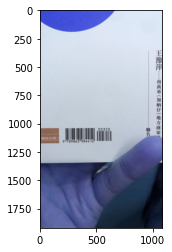

In [6]:
plt.imshow(im)

In [7]:
decodedObjects = decode(im)


Type :  EAN13
Data :  b'9789863984412' 



In [ ]:
display(im, decodedObjects)